In [1]:
import pyaudio
import wave
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
from matplotlib import cm
import librosa
import librosa.display
import pandas as pd
import IPython
import numpy as np
import sys
import os
import pandas as pd

from tqdm import tqdm
from shutil import copyfile
from keras import optimizers, regularizers
from keras.models import Sequential, load_model
from keras.callbacks import ModelCheckpoint, LearningRateScheduler, EarlyStopping
from keras.callbacks import  History, ReduceLROnPlateau, CSVLogger
from keras.layers import Dense, Activation, Conv1D, MaxPooling1D, Flatten, BatchNormalization
from keras.layers import Dropout
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
from keras.utils import plot_model


from sklearn.model_selection import train_test_split  
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

import pywt

import seaborn as sns  
import tensorflow as tf
tf.test.is_gpu_available()
%matplotlib inline

Using TensorFlow backend.


In [2]:
dirname = 'Processed_Dataset'

In [3]:
directory = os.getcwd()
files = [f for f in sorted(os.listdir(dirname + '//Actor_01')) if f.endswith('.wav')]
print(files[0])
print(len(files))

Angry-Normal-01-01.wav
60


In [ ]:
CHUNK = 1024 
FORMAT = pyaudio.paInt16 #paInt8
CHANNELS = 2 
RATE = 44100 #sample rate
RECORD_SECONDS = 5
wave_folder_name = 'Avani_Keyword\\'
if not os.path.exists(wave_folder_name):
    os.mkdir(wave_folder_name)
WAVE_OUTPUT_FILENAME = input('FileName - ')
folder_loc = wave_folder_name + WAVE_OUTPUT_FILENAME

p = pyaudio.PyAudio()

stream = p.open(format=FORMAT,
                channels=CHANNELS,
                rate=RATE,
                input=True,
                frames_per_buffer=CHUNK) #buffer

print("* recording")

frames = []

for i in range(0, int(RATE / CHUNK * RECORD_SECONDS)):
    data = stream.read(CHUNK)
    frames.append(data) # 2 bytes(16 bits) per channel

print("* done recording")

stream.stop_stream()
stream.close()
p.terminate()

wf = wave.open(folder_loc, 'wb')
wf.setnchannels(CHANNELS)
wf.setsampwidth(p.get_sample_size(FORMAT))
wf.setframerate(RATE)
wf.writeframes(b''.join(frames))
wf.close()

import IPython.display as ipd
ipd.Audio(folder_loc) # load the recorded WAV file

In [4]:
audio_path = dirname + '//Actor_01//' + str(files[19])
sr, x = wavfile.read(audio_path)

In [5]:
x
len(x)

84610

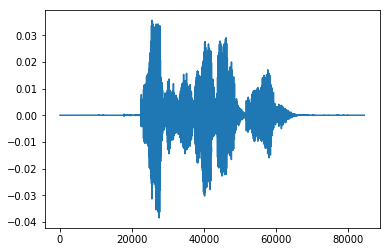

In [6]:
plt.plot(x)
plt.show()

In [7]:
y, sr = librosa.load(audio_path)

In [8]:
wavfile.write(files[19], sr, y)

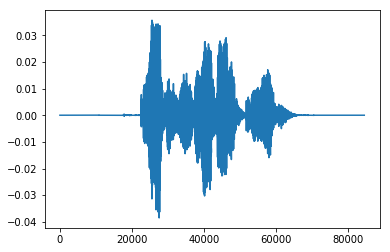

In [9]:
plt.plot(y)
plt.show()

In [10]:
y.dtype

dtype('float32')

In [11]:
x.dtype

dtype('float32')

In [12]:
np.sum(y - x)

0.0018086354

In [13]:
import IPython.display as ipd
ipd.Audio(audio_path) # load a local WAV file

In [14]:
folder = os.getcwd()
actors_folder_path = ['../RAVDESS/' + str(f) for f in os.listdir('../RAVDESS/') if os.path.isdir('../RAVDESS/' + str(f))]
print(actors_folder_path)
actors_folder = [str(f) for f in os.listdir('../RAVDESS/') if os.path.isdir('../RAVDESS/' + str(f))]
print(actors_folder)

['../RAVDESS/Actor_01', '../RAVDESS/Actor_02', '../RAVDESS/Actor_03', '../RAVDESS/Actor_04', '../RAVDESS/Actor_05', '../RAVDESS/Actor_06', '../RAVDESS/Actor_07', '../RAVDESS/Actor_08', '../RAVDESS/Actor_09', '../RAVDESS/Actor_10', '../RAVDESS/Actor_11', '../RAVDESS/Actor_12', '../RAVDESS/Actor_13', '../RAVDESS/Actor_14', '../RAVDESS/Actor_15', '../RAVDESS/Actor_16', '../RAVDESS/Actor_17', '../RAVDESS/Actor_18', '../RAVDESS/Actor_19', '../RAVDESS/Actor_20', '../RAVDESS/Actor_21', '../RAVDESS/Actor_22', '../RAVDESS/Actor_23', '../RAVDESS/Actor_24']
['Actor_01', 'Actor_02', 'Actor_03', 'Actor_04', 'Actor_05', 'Actor_06', 'Actor_07', 'Actor_08', 'Actor_09', 'Actor_10', 'Actor_11', 'Actor_12', 'Actor_13', 'Actor_14', 'Actor_15', 'Actor_16', 'Actor_17', 'Actor_18', 'Actor_19', 'Actor_20', 'Actor_21', 'Actor_22', 'Actor_23', 'Actor_24']


In [6]:
dirname = 'Processed_Dataset'
os.mkdir(dirname)

FileExistsError: [WinError 183] Cannot create a file when that file already exists: 'Processed_Dataset'

In [2]:
## Name Change
for j, folder in enumerate(actors_folder_path):
    files = [f for f in os.listdir(folder) if f.endswith('.wav')]
    files1 = [file.split('-') for file in files]
    print(len(files1))
    print(files1[0])
    i = 0
    
    if not os.path.isdir(dirname + '\\' + actors_folder[j]):
        os.mkdir(dirname + '\\' + actors_folder[j])
    src_loc = folder
    loc = os.getcwd() + '\\' + dirname + '\\' + actors_folder[j]
    
    for file in files1:
        print(file)
        src = src_loc + "\\" + files[i]
        dst = loc + "\\"
        if(file[2] == "01"):
            dst += "Neutral"
        elif(file[2] == "02"):
            dst += "Calm"
        elif(file[2] == "03"):
            dst += "Happy"
        elif(file[2] == "04"):
            dst += "Sad"
        elif(file[2] == "05"):
            dst += "Angry"
        elif(file[2] == "06"):
            dst += "Fear"
        elif(file[2] == "07"):
            dst += "Disgust"
        elif(file[2] == "08"):
            dst += "Surprise"

        dst += '-'
        if(file[3] == "01"):
            dst += "Normal"
        elif(file[3] == "02"):
            dst += "Strong"
        dst += '-'
        dst += file[4] + '-' + file[5]
        
        ## Load source audio file using Librosa library
        y, sr = librosa.load(src)
        
        ## Write it a new file in the destination folder
        wavfile.write(dst + '.wav', sr, y)
        
#         copyfile(src_loc, dst)
        i += 1

NameError: name 'actors_folder_path' is not defined

In [14]:
audio_path = dirname + '//Actor_02//' + str(files[39])
samplingFrequency, signalData = wavfile.read(audio_path)
print(samplingFrequency)
print(os.getcwd() + audio_path)
## Play IPython audio
import IPython.display as ipd
ipd.Audio(audio_path) # load a local WAV file

22050
D:\PDF\7th_Sem\BTP\ModelProcessed_Dataset//Actor_02//Happy-Strong-02-02.wav


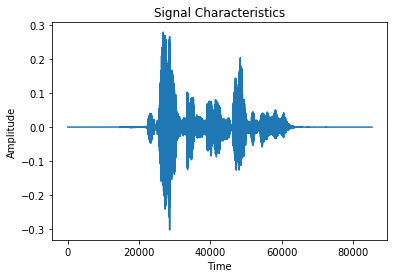

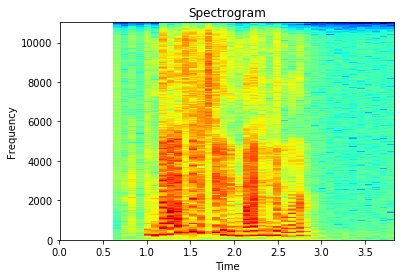

(1025, 667)


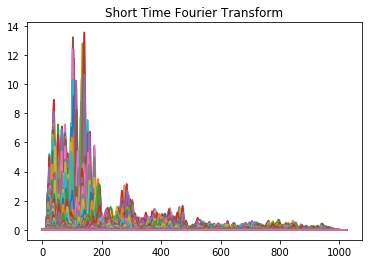

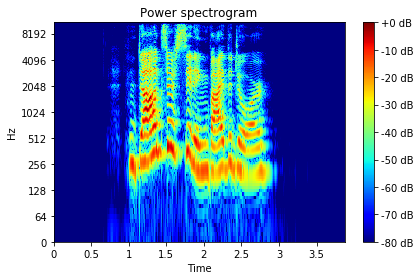

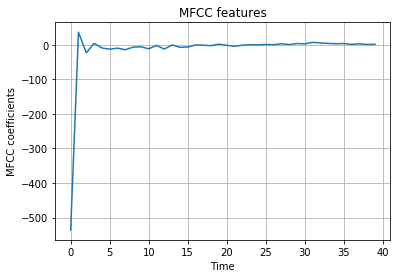

(128,)


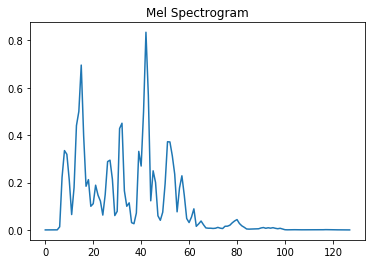

In [68]:
# Plot Signal
plt.plot(signalData)
plt.title('Signal Characteristics')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()


## Plot Spectrogram
plt.specgram(signalData, Fs=samplingFrequency, NFFT = 2048, noverlap  = 128, cmap=cm.jet)
# plt.xlim(left = 0.7)
plt.title('Spectrogram')
plt.xlabel('Time')
plt.ylabel('Frequency')
plt.show()

#Spectrogram
stft = np.abs(librosa.stft(signalData, win_length=512, hop_length=128))
print(stft.shape)
plt.plot(stft)
plt.title('Short Time Fourier Transform')
# plt.colorbar()
plt.show()


# Power Spectrogram
librosa.display.specshow(librosa.amplitude_to_db(stft, ref=np.max), 
                         hop_length=128, 
                         x_axis='time', 
                         y_axis='log', 
                         cmap=cm.jet)
plt.title('Power spectrogram')
plt.colorbar(format='%+2.0f dB')
plt.tight_layout()
plt.show()


mfccs = np.mean(librosa.feature.mfcc(signalData, sr=samplingFrequency, n_mfcc = 40).T, axis = 0)
# print(mfccs.shape)
#Displaying  the MFCCs:
#librosa.display.specshow(mfccs, sr=sr, x_axis='time')
plt.plot(mfccs)
plt.title('MFCC features')
plt.xlabel('Time')
plt.ylabel('MFCC coefficients')
plt.grid()
plt.show()

mel_spectrogram = np.mean(librosa.feature.melspectrogram(signalData, sr = samplingFrequency).T, axis = 0)
print(mel_spectrogram.shape)
plt.plot(mel_spectrogram)
plt.title('Mel Spectrogram')
plt.show()

In [9]:
pitches, magnitudes = librosa.core.piptrack(signalData, sr=samplingFrequency)
print(np.mean(pitches))
# print(pitches[0])

45.913445


In [10]:
mfccs.shape

(40,)

In [11]:
mf = mfccs.reshape((mfccs.shape[0], 1))

In [12]:
mf.shape

(40, 1)

In [70]:
#Total number of files
Total_files = 0
Files = []
Files_loc = []
for i in range(len(os.listdir(os.path.join(os.getcwd(), 'Processed_Dataset')))):
    folder_name = os.listdir(os.path.join(os.getcwd(), 'Processed_Dataset'))[i]
    files = os.listdir(os.path.join(os.getcwd(), 'Processed_Dataset', folder_name))
    Fil = [os.path.join(os.getcwd(), 'Processed_Dataset', folder_name,  f) for f in files]
    Files_loc.append(Fil)
#     files = ['Female_' + x for x in files if i%2]
#     files = ['Male_' + x for x in files if not i%2]
    
    Files.append(files)

training_files = []
training_files_loc = []
for i, x in enumerate(Files):
    
    # Omitting Calm and Neutral emotions from the training database
    for file in Files_loc[i]:
        if file.split('\\')[7].split('-')[0] == 'Calm' or file.split('\\')[7].split('-')[0] == 'Neutral':
            continue
        else:
            training_files_loc.append(file)
    if i%2:
        for file in x:
            training_files.append('Female_' + file)
    else:
        for file in x:
            training_files.append('Male_' + file)

In [71]:
print(len(Files))
print(len(Files_loc[23]))

24
60


In [16]:
Files[0]

['Angry-Normal-01-01.wav',
 'Angry-Normal-01-02.wav',
 'Angry-Normal-02-01.wav',
 'Angry-Normal-02-02.wav',
 'Angry-Strong-01-01.wav',
 'Angry-Strong-01-02.wav',
 'Angry-Strong-02-01.wav',
 'Angry-Strong-02-02.wav',
 'Calm-Normal-01-01.wav',
 'Calm-Normal-01-02.wav',
 'Calm-Normal-02-01.wav',
 'Calm-Normal-02-02.wav',
 'Calm-Strong-01-01.wav',
 'Calm-Strong-01-02.wav',
 'Calm-Strong-02-01.wav',
 'Calm-Strong-02-02.wav',
 'Disgust-Normal-01-01.wav',
 'Disgust-Normal-01-02.wav',
 'Disgust-Normal-02-01.wav',
 'Disgust-Normal-02-02.wav',
 'Disgust-Strong-01-01.wav',
 'Disgust-Strong-01-02.wav',
 'Disgust-Strong-02-01.wav',
 'Disgust-Strong-02-02.wav',
 'Fear-Normal-01-01.wav',
 'Fear-Normal-01-02.wav',
 'Fear-Normal-02-01.wav',
 'Fear-Normal-02-02.wav',
 'Fear-Strong-01-01.wav',
 'Fear-Strong-01-02.wav',
 'Fear-Strong-02-01.wav',
 'Fear-Strong-02-02.wav',
 'Happy-Normal-01-01.wav',
 'Happy-Normal-01-02.wav',
 'Happy-Normal-02-01.wav',
 'Happy-Normal-02-02.wav',
 'Happy-Strong-01-01.wav',
 

In [17]:
len(training_files)

1440

In [18]:
print(len(training_files_loc))

1152


In [19]:
def extract_features(signalData, sampling_rate):
    stft = np.abs(librosa.stft(signalData))
    mfccs = np.mean(librosa.feature.mfcc(signalData, sr = sampling_rate, n_mfcc = 40).T, axis = 0)
    mel = np.mean(librosa.feature.melspectrogram(signalData, sr = sampling_rate).T, axis = 0)
    contrast = np.mean(librosa.feature.spectral_contrast(S = stft, sr=sampling_rate).T, axis=0)
    
    
    return mfccs, mel, contrast

def extract_features_only_mfcc(signalData, sampling_rate):
    mfccs = np.mean(librosa.feature.mfcc(signalData, sr = sampling_rate, n_mfcc = 40).T, axis = 0)
    return mfccs


def wavelet_features(data, scales = range(1,128), waveletname = 'morl'):
    coeff, _ = pywt.cwt(signalData, scales, waveletname, 1)
    coeff_ = coeff[:,:127]
    return coeff_
    

In [23]:
# mfccs, mel, contrast = extract_features(training_files_loc[0], 22050)
samplingFrequency, signalData = wavfile.read(training_files_loc[0])
mfccs, mel, contrast = extract_features(signalData, samplingFrequency)

In [24]:
print(mfccs.shape)
print(mel.shape)
print(contrast.shape)

(40,)
(128,)
(7,)


# Data Augmentation
   ## Dynamic Value Change

In [15]:
def dyn_change(data, type = 'standard_normal'):
    """
    Random Value Change.
    """
#     print(type)
    if type == 'uniform':
        dyn_change = np.random.uniform(low=3,high=3)
    elif type == 'standard_normal':
        dyn_change = np.random.standard_normal()
    elif type == 'Poisson':
        dyn_change = np.random.poisson(lam = 2.0)
    elif type == 'rayleigh':
        dyn_change = np.random.rayleigh()
    return data*dyn_change


## Pitch Tuning
# Shift the pitch of a waveform by n_steps semitones.
# Link: https://librosa.github.io/librosa/generated/librosa.effects.pitch_shift.html
def pitch(data, sample_rate):
    """
    Pitch Tuning.
    """
    bins_per_octave = 12
    pitch_pm = 2
    pitch_change =  pitch_pm * 2*(np.random.uniform())   
    data1 = librosa.effects.pitch_shift(data, 
                                      sample_rate, n_steps=pitch_change, 
                                      bins_per_octave=bins_per_octave)
    return data1
    
## Random Shifting
def shift(data, type = 'left'):
    """
    Random Shifting.
    """
    s_range = int(np.random.uniform(low=-30, high = 20)*500)
    return np.roll(data, s_range)

## White Noise Adding
def noise(data):
    """
    Adding White Noise.
    """
    # you can take any distribution from https://docs.scipy.org/doc/numpy-1.13.0/reference/routines.random.html
    noise_amp = 0.005*np.random.uniform()*np.amax(data)
    data = data + noise_amp * np.random.normal(size = data.shape[0])
    return data

def AWGN(data):
    # Adding noise using target SNR

    # Set a target SNR
    target_snr_db = 30
    # Calculate signal power and convert to dB 
    sig_avg_watts = np.mean(data**2)
    sig_avg_db = 10 * np.log10(sig_avg_watts)
    
    # Calculate noise according to [2] then convert to watts
    noise_avg_db = sig_avg_db - target_snr_db
    noise_avg_watts = 10 ** (noise_avg_db / 10)
    # Generate an sample of white noise
    mean_noise = 0
    noise_volts = np.random.normal(mean_noise, np.sqrt(noise_avg_watts), len(data**2))
    data = data + noise_volts
    
    return data

In [27]:
def parse_audio_files_only_wavelets(training_files_loc):
    print('---Parsing The audio file. \n This may take some time----')
    features, labels = np.empty((len(training_files_loc)*5, 127, 127)), np.empty(0)
    for ii, file in enumerate(tqdm(training_files_loc)):
        try:
            signalData, sampling_rate = librosa.load(file)
            coeffs = wavelet_features(signalData)
            
            dyn_data = dyn_change(signalData, 'standard_normal')
            coeffs1 = wavelet_features(dyn_data)
            
            random_shift_data = shift(signalData)
            coeffs2 = wavelet_features(random_shift_data)
            
            pitch_shifted_data = pitch(signalData, sampling_rate)
            coeffs3 = wavelet_features(pitch_shifted_data)
        
            AWGN_data = AWGN(signalData)
            coeffs4 = wavelet_features(AWGN_data)
            
            
        except Exception as e:
            print(str(e) + ' Error encountered while parsing file - ', file)
            continue
            
        ext_features = np.hstack([coeffs])
        features[ii*5, :, :] = coeffs
        features[ii*5 + 1, :, :] = coeffs1
        features[ii*5 + 2, :, :] = coeffs2
        features[ii*5 + 3, :, :] = coeffs3
        features[ii*5 + 4, :, :] = coeffs4
        
        file_name = file.split('\\')[7]
        label_name = file_name.split('-')[0]
        label_no = 0
        
        # Converting Label name to label number for one hot encoding
        if label_name == 'Angry':
            label_no = 5
        elif label_name == 'Fear':
            label_no = 6
        elif label_name == 'Disgust':
            label_no = 7
        elif label_name == 'Surprise':
            label_no = 8
        elif label_name == 'Happy':
            label_no = 3
        elif label_name == 'Sad':
            label_no = 4
            
        labels = np.append(labels, label_no - 3)
        labels = np.append(labels, label_no - 3) # Dyn
        labels = np.append(labels, label_no - 3) # Random Shift
        labels = np.append(labels, label_no - 3) # Pitch Shift
        labels = np.append(labels, label_no - 3) # AWGN
        
    print('----Done----')
    return np.array(features), np.array(labels, dtype = np.int)
        
    

In [55]:
def parse_audio_files_only_mfcc(training_files_loc):
    print('---Parsing The audio file. \n This may take some time----')
    features, labels = np.empty((0, 40)), np.empty(0)
    for file in tqdm(training_files_loc):
        try:
            signalData, sampling_rate = librosa.load(file)
            mfccs = extract_features_only_mfcc(signalData, sampling_rate)
            
            dyn_data = dyn_change(signalData, 'standard_normal')
            mfccs1 = extract_features_only_mfcc(dyn_data, sampling_rate)
            
            random_shift_data = shift(signalData)
            mfccs2 = extract_features_only_mfcc(random_shift_data, sampling_rate)
            
            pitch_shifted_data = pitch(signalData, sampling_rate)
            mfccs3 = extract_features_only_mfcc(pitch_shifted_data, sampling_rate)
        
            AWGN_data = AWGN(signalData)
            mfccs4 = extract_features_only_mfcc(AWGN_data, sampling_rate)
            
            
        except Exception as e:
            print(str(e) + ' Error encountered while parsing file - ', file)
            continue
            
        ext_features = np.hstack([mfccs])
        features = np.vstack([features, ext_features])
        
        ext_features = np.hstack([mfccs1])
        features = np.vstack([features, ext_features])
        
        ext_features = np.hstack([mfccs2])
        features = np.vstack([features, ext_features])
        
        ext_features = np.hstack([mfccs3])
        features = np.vstack([features, ext_features])
        
        ext_features = np.hstack([mfccs4])
        features = np.vstack([features, ext_features])
        
        file_name = file.split('\\')[7]
        label_name = file_name.split('-')[0]
        label_no = 0
        
        # Converting Label name to label number for one hot encoding
        if label_name == 'Angry':
            label_no = 5
        elif label_name == 'Fear':
            label_no = 6
        elif label_name == 'Disgust':
            label_no = 7
        elif label_name == 'Surprise':
            label_no = 8
        elif label_name == 'Happy':
            label_no = 3
        elif label_name == 'Sad':
            label_no = 4
            
        labels = np.append(labels, label_no - 3)
        labels = np.append(labels, label_no - 3) # Dyn
        labels = np.append(labels, label_no - 3) # Random Shift
        labels = np.append(labels, label_no - 3) # Pitch Shift
        labels = np.append(labels, label_no - 3) # AWGN
        
    print('----Done----')
    return np.array(features), np.array(labels, dtype = np.int)
        
    

In [23]:
def parse_audio_files(training_files_loc):
    print('---Parsing The audio file. \n This may take some time----')
    features, labels = np.empty((0, 175)), np.empty(0)
    for file in tqdm(training_files_loc):
        try:
            signalData, sampling_rate = librosa.load(file)
            mfccs, mel, contrast = extract_features(signalData, sampling_rate)
            
            dyn_data = dyn_change(signalData, 'standard_normal')
            mfccs1, mel1, contrast1 = extract_features(dyn_data, sampling_rate)
            
            random_shift_data = shift(signalData)
            mfccs2, mel2, contrast2 = extract_features(random_shift_data, sampling_rate)
            
            pitch_shifted_data = pitch(signalData, sampling_rate)
            mfccs3, mel3, contrast3 = extract_features(pitch_shifted_data, sampling_rate)
            
            AWGN_data = AWGN(signalData)
            mfccs4, mel4, contrast4 = extract_features(AWGN_data, sampling_rate)
            
            
        except Exception as e:
            print(str(e) + ' Error encountered while parsing file - ', file)
            continue
            
        ext_features = np.hstack([mfccs, mel, contrast])
        features = np.vstack([features, ext_features])
        
        ext_features = np.hstack([mfccs1, mel1, contrast1])
        features = np.vstack([features, ext_features])
        
        ext_features = np.hstack([mfccs2, mel2, contrast2])
        features = np.vstack([features, ext_features])
        
        ext_features = np.hstack([mfccs3, mel3, contrast3])
        features = np.vstack([features, ext_features])
        
        ext_features = np.hstack([mfccs4, mel4, contrast4])
        features = np.vstack([features, ext_features])
        
        file_name = file.split('\\')[7]
        label_name = file_name.split('-')[0]
        label_no = 0
        
        # Converting Label name to label number for one hot encoding
        if label_name == 'Angry':
            label_no = 5
        elif label_name == 'Fear':
            label_no = 6
        elif label_name == 'Disgust':
            label_no = 7
        elif label_name == 'Surprise':
            label_no = 8
        elif label_name == 'Happy':
            label_no = 3
        elif label_name == 'Sad':
            label_no = 4
            
        labels = np.append(labels, label_no - 3)
        labels = np.append(labels, label_no - 3) # Dyn
        labels = np.append(labels, label_no - 3) # Random Shift
        labels = np.append(labels, label_no - 3) # Pitch Shift
        labels = np.append(labels, label_no - 3) # AWGN
        
    print('----Done----')
    return np.array(features), np.array(labels, dtype = np.int)
        
    

In [28]:
features, labels = parse_audio_files_only_wavelets(training_files_loc)

---Parsing The audio file. 
 This may take some time----


  0%|▎                                                                                                                                                                       | 2/1152 [00:43<7:10:27, 22.46s/it]

KeyboardInterrupt: 

In [25]:
print(labels.shape)
print(features.shape)
print(labels[0:49])
print(features.shape[0])

(5760,)
(5760, 127, 127)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 4 4 4 4 4 4 4 4 4]
5760


In [21]:
features_dir = 'Features_and_Labels\\'

np.save(features_dir + 'Features_only_Wavelets_All', features)
np.save(features_dir + 'Labels_only_Wavelets_All', labels)

In [22]:
features = np.load(features_dir + 'features_only_MFCC.npy')
labels = np.load(features_dir + 'labels_only_MFCC.npy')
print(labels.shape)
print(features.shape)
print(labels[0:49])

(5760,)
(5760, 40)
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 4 4 4 4 4 4 4 4 4]


In [23]:
def one_hot_encode(labels, n_classes = 6):
    n_labels = len(labels)
#     n_unique_labels = len(np.unique(labels))
    one_hot_encode = np.zeros((n_labels, n_classes))
    one_hot_encode[np.arange(n_labels), labels] = 1
    return one_hot_encode

In [24]:
encoded_labels = one_hot_encode(labels)

In [25]:
labels

array([2, 2, 2, ..., 5, 5, 5])

In [26]:
encoded_labels[47]

array([0., 0., 0., 0., 1., 0.])

In [31]:
np.save(features_dir + 'X_only_Wavelets_All', features)
np.save(features_dir + 'Y_only_Wavelets_All', encoded_labels)

In [27]:
X = np.load(features_dir + 'X_only_MFCC.npy')
Y = np.load(features_dir + 'Y_only_MFCC.npy')

In [28]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.1317, random_state = 42, shuffle = True, stratify = Y)

In [29]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5001, 40)
(5001, 6)
(759, 40)
(759, 6)


In [132]:
train_X_cnn = np.expand_dims(train_X, axis = 2)
test_X_cnn = np.expand_dims(test_X, axis = 2)
print(train_X_cnn.shape)
print(test_X_cnn.shape)

(5001, 40, 1)
(759, 40, 1)


In [31]:
n_dim = train_X.shape[1]
n_classes = train_Y.shape[1]
n_hidden_units_1 = n_dim
n_hidden_units_2 = 400
n_hidden_units_3 = 200
n_hidden_units_4 = 100

def dense_net_model(activation_func = 'relu', init_type='normal', optimiser='adam', dropout_rate=0.35):
    model = Sequential()
    
    # Layer 1
    model.add(Dense(n_hidden_units_1, input_dim = n_dim, init = init_type, activation = activation_func))
    
    # Layer 2
    model.add(Dense(n_hidden_units_2, init = init_type, activation = activation_func))
    model.add(Dropout(dropout_rate))
    
    # Layer 3
    model.add(Dense(n_hidden_units_3, init = init_type, activation = activation_func))
    model.add(Dropout(dropout_rate))
    
    # Layer 4
    model.add(Dense(n_hidden_units_4, init = init_type, activation = activation_func))
    model.add(Dropout(dropout_rate))
    
    # Output Layer
    model.add(Dense(n_classes, init = init_type, activation = 'softmax'))
    
    # Compiling the model
    rmsprop = optimizers.RMSprop(lr=0.0009, decay = 1e-6)
    model.compile(loss='categorical_crossentropy', optimizer=rmsprop, metrics=['accuracy'])
    
    return model

def conv1d_model(activation_func = 'relu', k_init ='glorot_uniform'):
    model = Sequential()
    
    # Layer 1
    model.add(Conv1D(128, 5,padding='same', input_shape=(n_dim,1), kernel_initializer = k_init,  name = 'Conv1D_1')) #1
    model.add(Activation(activation_func, name = 'Activation_1'))
    
    model.add(Conv1D(128, 5,padding='same', kernel_initializer = k_init, name = 'Conv1D_2')) #2
    model.add(BatchNormalization(name = 'BatchNormalization_2'))
    model.add(Activation(activation_func, name = 'Activation_2'))
    model.add(Dropout(0.1, name = 'Dropout_2'))
    model.add(MaxPooling1D(pool_size=(8), name = 'Max_pooling_2'))
    
    model.add(Conv1D(128, 5,padding='same', kernel_initializer = k_init, name = 'Conv1D_3')) #3
    model.add(Activation(activation_func, name = 'Activation_3'))
    
    #model.add(Conv1D(128, 5,padding='same', kernel_initializer = k_init, name = 'Conv1D_4')) #4
    #model.add(Activation(activation_func, name = 'Activation_4')))
    
    #model.add(Conv1D(128, 5,padding='same', kernel_initializer = k_init, name = 'Conv1D_4')) #5
    #model.add(Activation(activation_func, name = 'Activation_4')))
    #model.add(Dropout(0.2, name = 'Dropout_2'))
    
    model.add(Conv1D(128, 5,padding='same', kernel_initializer = k_init, name = 'Conv1D_4')) #6
    model.add(Activation(activation_func, name = 'Activation_4'))
    model.add(Flatten(name = 'Flatten'))
    
    model.add(Dense(64, kernel_initializer = k_init, name = 'Dense_5')) #7
    model.add(Activation(activation_func, name = 'Activation_5'))
    
    model.add(Dense(n_classes, name = 'Output_Layer'))
    model.add(Activation('softmax', name = 'Activation_Softmax'))
    
    opt = optimizers.rmsprop(lr=0.0002, decay=1e-6)
    model.compile(loss = 'categorical_crossentropy', optimizer = opt, metrics = ['accuracy'])
    
    return model

def VGG16(f, train_Y):
#     from keras.applications.vgg16 import VGG16
#     from keras.preprocessing import image
#     from keras.applications.vgg16 import preprocess_input
    
#     model = VGG16(weights='imagenet', include_top=False)
#     x = train_X
#     f = np.empty((x.shape[0], 127, 127, 3))
#     for ii in range(x.shape[0]):
#         f[ii, :, :, 0] = x[ii, :, :]
#         f[ii, :, :, 1] = x[ii, :, :]
#         f[ii, :, :, 2] = x[ii, :, :]
#     print(f.shape)

#     print(x.shape)
#     f = preprocess_input(f)
#     features_ = model.predict(f)
    
#     from keras.applications.vgg16 import VGG16
#     from keras.preprocessing import image
#     from keras.applications.vgg16 import preprocess_input
    from keras.applications.inception_v3 import InceptionV3
    from keras.models import Model
    from keras.layers import Dense, GlobalAveragePooling2D
    from keras import backend as K

    # create the base pre-trained model
    base_model = InceptionV3(weights='imagenet', include_top=False)
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    # let's add a fully-connected layer
    x = Dense(1024, activation='relu')(x)
    x = Dense(128, activation='relu')(x)
    # and a logistic layer -- let's say we have 200 classes
    predictions = Dense(6, activation='softmax')(x)
    # this is the model we will train
    model_ = Model(inputs=base_model.input, outputs=predictions)
    # first: train only the top layers (which were randomly initialized)
    # i.e. freeze all convolutional InceptionV3 layers
    for layer in base_model.layers:
        layer.trainable = False
    # compile the model (should be done *after* setting layers to non-trainable)
    opt = optimizers.rmsprop(lr=0.002, decay=1e-6)
    model_.compile(optimizer=opt, loss='categorical_crossentropy', metrics = ['accuracy'])
    model_.fit(f, train_Y, epochs = 100, batch_size = 1024)
    
    # at this point, the top layers are well trained and we can start fine-tuning
    # convolutional layers from inception V3. We will freeze the bottom N layers
    # and train the remaining top layers.

    # let's visualize layer names and layer indices to see how many layers
    # we should freeze:
#     for i, layer in enumerate(base_model.layers):
#        print(i, layer.name)

    # we chose to train the top 2 inception blocks, i.e. we will freeze
    # the first 249 layers and unfreeze the rest:
    for layer in model_.layers[:249]:
       layer.trainable = False
    for layer in model_.layers[249:]:
       layer.trainable = True

    # we need to recompile the model for these modifications to take effect
    # we use SGD with a low learning rate
    from keras.optimizers import SGD
    model_.compile(optimizer=SGD(lr=0.0001, momentum=0.9), loss='categorical_crossentropy', metrics = ['accuracy'])
    
#     print(model_.summary())
    
    # we train our model again (this time fine-tuning the top 2 inception blocks
    # alongside the top Dense layers
    
    
    return model_

(5001, 127, 127, 3)
(5001, 127, 127)
Epoch 1/100
5001/5001 [==============================] - ETA: 46s - loss: 1.8289 - acc: 0.16 - ETA: 20s - loss: 7.7222 - acc: 0.16 - ETA: 9s - loss: 9.6079 - acc: 0.1634 - ETA: 3s - loss: 10.5940 - acc: 0.16 - 25s 5ms/step - loss: 11.1070 - acc: 0.1632
Epoch 2/100
5001/5001 [==============================] - ETA: 7s - loss: 13.0960 - acc: 0.18 - ETA: 5s - loss: 13.3084 - acc: 0.17 - ETA: 3s - loss: 13.3688 - acc: 0.17 - ETA: 1s - loss: 13.4108 - acc: 0.16 - 9s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 3/100
5001/5001 [==============================] - ETA: 7s - loss: 13.7413 - acc: 0.14 - ETA: 5s - loss: 13.5052 - acc: 0.16 - ETA: 3s - loss: 13.4895 - acc: 0.16 - ETA: 1s - loss: 13.4659 - acc: 0.16 - 9s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 4/100
5001/5001 [==============================] - ETA: 7s - loss: 13.4108 - acc: 0.16 - ETA: 5s - loss: 13.5288 - acc: 0.16 - ETA: 3s - loss: 13.4422 - acc: 0.16 - ETA: 1s - loss: 13.4619 - acc: 0.16 -

5001/5001 [==============================] - ETA: 7s - loss: 13.4895 - acc: 0.16 - ETA: 5s - loss: 13.4265 - acc: 0.16 - ETA: 3s - loss: 13.3740 - acc: 0.17 - ETA: 1s - loss: 13.3832 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 66/100
5001/5001 [==============================] - ETA: 7s - loss: 13.5839 - acc: 0.15 - ETA: 5s - loss: 13.4501 - acc: 0.16 - ETA: 3s - loss: 13.4160 - acc: 0.16 - ETA: 1s - loss: 13.4619 - acc: 0.16 - 9s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 67/100
5001/5001 [==============================] - ETA: 7s - loss: 13.0960 - acc: 0.18 - ETA: 5s - loss: 13.2219 - acc: 0.17 - ETA: 3s - loss: 13.3583 - acc: 0.17 - ETA: 1s - loss: 13.4029 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 68/100
5001/5001 [==============================] - ETA: 7s - loss: 13.5524 - acc: 0.15 - ETA: 5s - loss: 13.4029 - acc: 0.16 - ETA: 3s - loss: 13.3583 - acc: 0.17 - ETA: 1s - loss: 13.4108 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
Ep

5001/5001 [==============================] - ETA: 8s - loss: 13.3793 - acc: 0.16 - ETA: 6s - loss: 13.3714 - acc: 0.17 - ETA: 4s - loss: 13.4317 - acc: 0.16 - ETA: 1s - loss: 13.4540 - acc: 0.16 - 11s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 30/100
5001/5001 [==============================] - ETA: 8s - loss: 13.3478 - acc: 0.17 - ETA: 6s - loss: 13.4265 - acc: 0.16 - ETA: 3s - loss: 13.3163 - acc: 0.17 - ETA: 1s - loss: 13.3990 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 31/100
5001/5001 [==============================] - ETA: 8s - loss: 13.4108 - acc: 0.16 - ETA: 6s - loss: 13.4422 - acc: 0.16 - ETA: 3s - loss: 13.5104 - acc: 0.16 - ETA: 1s - loss: 13.4462 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 32/100
5001/5001 [==============================] - ETA: 8s - loss: 13.2691 - acc: 0.17 - ETA: 6s - loss: 13.4186 - acc: 0.16 - ETA: 3s - loss: 13.4003 - acc: 0.16 - ETA: 1s - loss: 13.5249 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
E

5001/5001 [==============================] - ETA: 7s - loss: 13.2534 - acc: 0.17 - ETA: 5s - loss: 13.4737 - acc: 0.16 - ETA: 3s - loss: 13.4370 - acc: 0.16 - ETA: 1s - loss: 13.4265 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 94/100
5001/5001 [==============================] - ETA: 7s - loss: 13.6626 - acc: 0.15 - ETA: 5s - loss: 13.6705 - acc: 0.15 - ETA: 3s - loss: 13.6364 - acc: 0.15 - ETA: 1s - loss: 13.5209 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 95/100
5001/5001 [==============================] - ETA: 7s - loss: 13.1904 - acc: 0.18 - ETA: 5s - loss: 13.4108 - acc: 0.16 - ETA: 3s - loss: 13.3530 - acc: 0.17 - ETA: 1s - loss: 13.3911 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
Epoch 96/100
5001/5001 [==============================] - ETA: 7s - loss: 13.4422 - acc: 0.16 - ETA: 5s - loss: 13.3950 - acc: 0.16 - ETA: 3s - loss: 13.4265 - acc: 0.16 - ETA: 1s - loss: 13.4344 - acc: 0.16 - 10s 2ms/step - loss: 13.4301 - acc: 0.1668
E

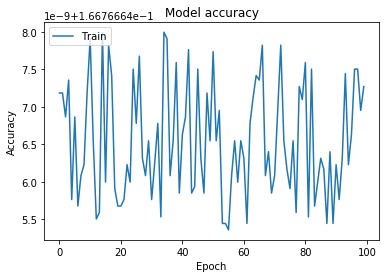

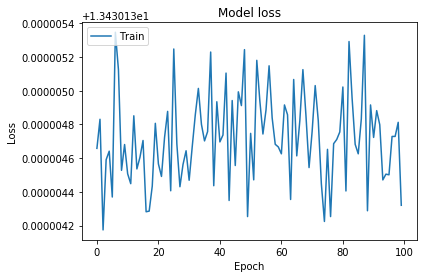

In [40]:
x = train_X
f = np.empty((x.shape[0], 127, 127, 3))
for ii in range(x.shape[0]):
    f[ii, :, :, 0] = x[ii, :, :]
    f[ii, :, :, 1] = x[ii, :, :]
    f[ii, :, :, 2] = x[ii, :, :]
print(f.shape)

print(x.shape)

model = VGG16(f, train_Y)


history = model.fit(f, train_Y, epochs = 100, batch_size = 1024)
    
model_dir = 'Saved_Models/'
model_name = '3_InceptionV3_SGD_Wavelets_All_RMSProp_lr_0.0002_decay_1e-6_100_epochs_1024_batch_size'
model_folder = model_dir + model_name
if not os.path.exists(model_folder):
    os.mkdir(model_folder)
model.save(model_folder + '\\' + 'model_' + model_name + '.h5')

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig(model_folder + '\\' + 'Model_Training_Accuracy.png')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig(model_folder + '\\' + 'Model_Training_Loss.png')
plt.show()


c:\python36\lib\site-packages\ipykernel_launcher.py:12: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(40, input_dim=40, activation="relu", kernel_initializer="normal")`
  if sys.path[0] == '':
c:\python36\lib\site-packages\ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(400, activation="relu", kernel_initializer="normal")`
  from ipykernel import kernelapp as app
c:\python36\lib\site-packages\ipykernel_launcher.py:19: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(200, activation="relu", kernel_initializer="normal")`
c:\python36\lib\site-packages\ipykernel_launcher.py:23: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(100, activation="relu", kernel_initializer="normal")`
c:\python36\lib\site-packages\ipykernel_launcher.py:27: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(6, activation="softmax", kernel_initializer="normal")`


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_11 (Dense)             (None, 40)                1640      
_________________________________________________________________
dense_12 (Dense)             (None, 400)               16400     
_________________________________________________________________
dropout_7 (Dropout)          (None, 400)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 200)               80200     
_________________________________________________________________
dropout_8 (Dropout)          (None, 200)               0         
_________________________________________________________________
dense_14 (Dense)             (None, 100)               20100     
_________________________________________________________________
dropout_9 (Dropout)          (None, 100)               0         
__________

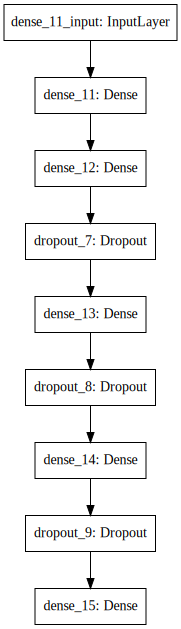

In [49]:
model = dense_net_model()
model.summary()
model_dir = 'Saved_Models/'
model_name = 'DenseNet_only_MFCC_Augmentated_data_Stratify_Y_DenseNet_RMSProp_0.0009_decay_1e-6_300_epochs_64_batchSize'
model_folder = model_dir + model_name
if not os.path.exists(model_folder):
    os.mkdir(model_folder)
plot_model(model, to_file= model_folder + '/' + model_name + '.png')
SVG(model_to_dot(model).create(prog='dot', format='svg'))

In [50]:
lr_reduce = ReduceLROnPlateau(monitor='loss', factor=0.9, patience=20, min_lr=0.000001)
# Please change the model name accordingly.
mcp_save = ModelCheckpoint(model_folder + '\\' + model_name + '.h5', save_best_only=True, monitor='loss', mode='min')

history = model.fit(train_X, train_Y, epochs = 300, batch_size = 64, callbacks = [mcp_save, lr_reduce])

Epoch 1/300
5001/5001 [==============================] - ETA: 41s - loss: 2.4938 - acc: 0.07 - ETA: 6s - loss: 2.0464 - acc: 0.1473 - ETA: 3s - loss: 1.9601 - acc: 0.157 - ETA: 2s - loss: 1.9171 - acc: 0.166 - ETA: 1s - loss: 1.8988 - acc: 0.165 - ETA: 1s - loss: 1.8836 - acc: 0.162 - ETA: 1s - loss: 1.8737 - acc: 0.167 - ETA: 1s - loss: 1.8668 - acc: 0.168 - ETA: 0s - loss: 1.8585 - acc: 0.172 - ETA: 0s - loss: 1.8547 - acc: 0.172 - ETA: 0s - loss: 1.8491 - acc: 0.174 - ETA: 0s - loss: 1.8447 - acc: 0.173 - ETA: 0s - loss: 1.8396 - acc: 0.176 - ETA: 0s - loss: 1.8363 - acc: 0.174 - ETA: 0s - loss: 1.8328 - acc: 0.176 - ETA: 0s - loss: 1.8300 - acc: 0.178 - 1s 284us/step - loss: 1.8285 - acc: 0.1788
Epoch 2/300
5001/5001 [==============================] - ETA: 0s - loss: 1.7422 - acc: 0.250 - ETA: 0s - loss: 1.7783 - acc: 0.208 - ETA: 0s - loss: 1.7919 - acc: 0.189 - ETA: 0s - loss: 1.7833 - acc: 0.195 - ETA: 0s - loss: 1.7809 - acc: 0.193 - ETA: 0s - loss: 1.7822 - acc: 0.198 - ETA: 0

Epoch 13/300
5001/5001 [==============================] - ETA: 1s - loss: 1.4772 - acc: 0.406 - ETA: 0s - loss: 1.2162 - acc: 0.526 - ETA: 0s - loss: 1.2334 - acc: 0.526 - ETA: 0s - loss: 1.2092 - acc: 0.531 - ETA: 0s - loss: 1.2000 - acc: 0.532 - ETA: 0s - loss: 1.2035 - acc: 0.528 - ETA: 0s - loss: 1.1978 - acc: 0.527 - ETA: 0s - loss: 1.2040 - acc: 0.524 - ETA: 0s - loss: 1.2066 - acc: 0.522 - ETA: 0s - loss: 1.2164 - acc: 0.516 - ETA: 0s - loss: 1.2198 - acc: 0.516 - ETA: 0s - loss: 1.2156 - acc: 0.520 - ETA: 0s - loss: 1.2125 - acc: 0.522 - ETA: 0s - loss: 1.2180 - acc: 0.520 - 1s 157us/step - loss: 1.2147 - acc: 0.5215
Epoch 14/300
5001/5001 [==============================] - ETA: 1s - loss: 1.4465 - acc: 0.421 - ETA: 0s - loss: 1.2263 - acc: 0.518 - ETA: 0s - loss: 1.1836 - acc: 0.542 - ETA: 0s - loss: 1.1377 - acc: 0.554 - ETA: 0s - loss: 1.1533 - acc: 0.549 - ETA: 0s - loss: 1.1526 - acc: 0.554 - ETA: 0s - loss: 1.1619 - acc: 0.550 - ETA: 0s - loss: 1.1564 - acc: 0.549 - ETA: 

5001/5001 [==============================] - ETA: 0s - loss: 0.7907 - acc: 0.718 - ETA: 0s - loss: 0.7452 - acc: 0.721 - ETA: 0s - loss: 0.7569 - acc: 0.717 - ETA: 0s - loss: 0.7480 - acc: 0.726 - ETA: 0s - loss: 0.7417 - acc: 0.724 - ETA: 0s - loss: 0.7488 - acc: 0.722 - ETA: 0s - loss: 0.7554 - acc: 0.720 - ETA: 0s - loss: 0.7598 - acc: 0.717 - ETA: 0s - loss: 0.7540 - acc: 0.720 - ETA: 0s - loss: 0.7479 - acc: 0.720 - ETA: 0s - loss: 0.7405 - acc: 0.720 - ETA: 0s - loss: 0.7515 - acc: 0.715 - ETA: 0s - loss: 0.7487 - acc: 0.718 - ETA: 0s - loss: 0.7497 - acc: 0.719 - ETA: 0s - loss: 0.7557 - acc: 0.718 - ETA: 0s - loss: 0.7619 - acc: 0.717 - 1s 182us/step - loss: 0.7594 - acc: 0.7187
Epoch 36/300
5001/5001 [==============================] - ETA: 0s - loss: 0.9381 - acc: 0.640 - ETA: 0s - loss: 0.7702 - acc: 0.698 - ETA: 0s - loss: 0.8056 - acc: 0.698 - ETA: 0s - loss: 0.7886 - acc: 0.697 - ETA: 0s - loss: 0.7779 - acc: 0.709 - ETA: 0s - loss: 0.7635 - acc: 0.713 - ETA: 0s - loss: 0.

5001/5001 [==============================] - ETA: 1s - loss: 0.6768 - acc: 0.765 - ETA: 0s - loss: 0.5514 - acc: 0.796 - ETA: 0s - loss: 0.4927 - acc: 0.829 - ETA: 0s - loss: 0.4844 - acc: 0.831 - ETA: 0s - loss: 0.4970 - acc: 0.828 - ETA: 0s - loss: 0.4974 - acc: 0.828 - ETA: 0s - loss: 0.5123 - acc: 0.822 - ETA: 0s - loss: 0.5250 - acc: 0.818 - ETA: 0s - loss: 0.5185 - acc: 0.818 - ETA: 0s - loss: 0.5167 - acc: 0.819 - ETA: 0s - loss: 0.5234 - acc: 0.817 - ETA: 0s - loss: 0.5253 - acc: 0.815 - ETA: 0s - loss: 0.5299 - acc: 0.814 - ETA: 0s - loss: 0.5400 - acc: 0.812 - ETA: 0s - loss: 0.5426 - acc: 0.810 - ETA: 0s - loss: 0.5453 - acc: 0.809 - ETA: 0s - loss: 0.5484 - acc: 0.808 - 1s 184us/step - loss: 0.5473 - acc: 0.8082
Epoch 56/300
5001/5001 [==============================] - ETA: 0s - loss: 0.5236 - acc: 0.765 - ETA: 0s - loss: 0.5951 - acc: 0.801 - ETA: 0s - loss: 0.6177 - acc: 0.783 - ETA: 0s - loss: 0.6067 - acc: 0.787 - ETA: 0s - loss: 0.5763 - acc: 0.793 - ETA: 0s - loss: 0.

5001/5001 [==============================] - ETA: 0s - loss: 0.9856 - acc: 0.718 - ETA: 0s - loss: 0.5493 - acc: 0.805 - ETA: 0s - loss: 0.5328 - acc: 0.805 - ETA: 0s - loss: 0.5270 - acc: 0.807 - ETA: 0s - loss: 0.5131 - acc: 0.814 - ETA: 0s - loss: 0.5254 - acc: 0.809 - ETA: 0s - loss: 0.5196 - acc: 0.813 - ETA: 0s - loss: 0.5234 - acc: 0.813 - ETA: 0s - loss: 0.5189 - acc: 0.815 - ETA: 0s - loss: 0.5026 - acc: 0.820 - ETA: 0s - loss: 0.4952 - acc: 0.821 - ETA: 0s - loss: 0.4998 - acc: 0.823 - ETA: 0s - loss: 0.4951 - acc: 0.824 - ETA: 0s - loss: 0.5024 - acc: 0.821 - ETA: 0s - loss: 0.4932 - acc: 0.824 - ETA: 0s - loss: 0.4922 - acc: 0.823 - ETA: 0s - loss: 0.4852 - acc: 0.824 - ETA: 0s - loss: 0.4802 - acc: 0.826 - 1s 198us/step - loss: 0.4824 - acc: 0.8262
Epoch 76/300
5001/5001 [==============================] - ETA: 0s - loss: 0.6033 - acc: 0.687 - ETA: 0s - loss: 0.5912 - acc: 0.793 - ETA: 0s - loss: 0.5053 - acc: 0.812 - ETA: 0s - loss: 0.4855 - acc: 0.823 - ETA: 0s - loss: 0.

5001/5001 [==============================] - ETA: 0s - loss: 0.5031 - acc: 0.812 - ETA: 0s - loss: 0.4740 - acc: 0.841 - ETA: 0s - loss: 0.4032 - acc: 0.859 - ETA: 0s - loss: 0.4152 - acc: 0.855 - ETA: 0s - loss: 0.4252 - acc: 0.853 - ETA: 0s - loss: 0.4199 - acc: 0.854 - ETA: 0s - loss: 0.4094 - acc: 0.860 - ETA: 0s - loss: 0.4123 - acc: 0.858 - ETA: 0s - loss: 0.4104 - acc: 0.858 - ETA: 0s - loss: 0.4235 - acc: 0.856 - ETA: 0s - loss: 0.4156 - acc: 0.860 - ETA: 0s - loss: 0.4059 - acc: 0.864 - ETA: 0s - loss: 0.3987 - acc: 0.866 - ETA: 0s - loss: 0.4157 - acc: 0.863 - ETA: 0s - loss: 0.4084 - acc: 0.865 - ETA: 0s - loss: 0.4078 - acc: 0.864 - ETA: 0s - loss: 0.4028 - acc: 0.865 - ETA: 0s - loss: 0.4020 - acc: 0.866 - ETA: 0s - loss: 0.4051 - acc: 0.865 - 1s 215us/step - loss: 0.4016 - acc: 0.8666
Epoch 96/300
5001/5001 [==============================] - ETA: 1s - loss: 0.5348 - acc: 0.796 - ETA: 1s - loss: 0.4182 - acc: 0.859 - ETA: 0s - loss: 0.4101 - acc: 0.864 - ETA: 0s - loss: 0.

5001/5001 [==============================] - ETA: 1s - loss: 0.3033 - acc: 0.906 - ETA: 0s - loss: 0.3306 - acc: 0.890 - ETA: 0s - loss: 0.3601 - acc: 0.882 - ETA: 0s - loss: 0.3616 - acc: 0.875 - ETA: 0s - loss: 0.3913 - acc: 0.870 - ETA: 0s - loss: 0.4025 - acc: 0.871 - ETA: 0s - loss: 0.3923 - acc: 0.876 - ETA: 0s - loss: 0.4142 - acc: 0.868 - ETA: 0s - loss: 0.4179 - acc: 0.865 - ETA: 0s - loss: 0.4191 - acc: 0.861 - ETA: 0s - loss: 0.4199 - acc: 0.860 - ETA: 0s - loss: 0.4120 - acc: 0.862 - ETA: 0s - loss: 0.4152 - acc: 0.861 - ETA: 0s - loss: 0.4133 - acc: 0.862 - ETA: 0s - loss: 0.4119 - acc: 0.862 - ETA: 0s - loss: 0.4125 - acc: 0.861 - ETA: 0s - loss: 0.4104 - acc: 0.861 - ETA: 0s - loss: 0.4071 - acc: 0.862 - 1s 200us/step - loss: 0.4098 - acc: 0.8612
Epoch 115/300
5001/5001 [==============================] - ETA: 0s - loss: 0.4094 - acc: 0.828 - ETA: 0s - loss: 0.3966 - acc: 0.859 - ETA: 0s - loss: 0.3715 - acc: 0.869 - ETA: 1s - loss: 0.3487 - acc: 0.882 - ETA: 0s - loss: 0

5001/5001 [==============================] - ETA: 1s - loss: 1.0415 - acc: 0.750 - ETA: 1s - loss: 0.6167 - acc: 0.804 - ETA: 0s - loss: 0.4624 - acc: 0.857 - ETA: 0s - loss: 0.4385 - acc: 0.857 - ETA: 0s - loss: 0.4322 - acc: 0.864 - ETA: 0s - loss: 0.4142 - acc: 0.869 - ETA: 0s - loss: 0.4077 - acc: 0.866 - ETA: 0s - loss: 0.4017 - acc: 0.866 - ETA: 0s - loss: 0.3978 - acc: 0.867 - ETA: 0s - loss: 0.3858 - acc: 0.871 - ETA: 0s - loss: 0.3843 - acc: 0.871 - ETA: 0s - loss: 0.3877 - acc: 0.869 - ETA: 0s - loss: 0.3897 - acc: 0.870 - ETA: 0s - loss: 0.3875 - acc: 0.869 - ETA: 0s - loss: 0.3810 - acc: 0.872 - ETA: 0s - loss: 0.3781 - acc: 0.874 - ETA: 0s - loss: 0.3759 - acc: 0.875 - ETA: 0s - loss: 0.3740 - acc: 0.875 - ETA: 0s - loss: 0.3743 - acc: 0.876 - 1s 210us/step - loss: 0.3738 - acc: 0.8758
Epoch 133/300
5001/5001 [==============================] - ETA: 0s - loss: 0.4912 - acc: 0.906 - ETA: 0s - loss: 0.5215 - acc: 0.837 - ETA: 0s - loss: 0.4420 - acc: 0.852 - ETA: 0s - loss: 0

5001/5001 [==============================] - ETA: 1s - loss: 0.2428 - acc: 0.921 - ETA: 0s - loss: 0.3434 - acc: 0.881 - ETA: 0s - loss: 0.3573 - acc: 0.886 - ETA: 0s - loss: 0.3436 - acc: 0.885 - ETA: 0s - loss: 0.3645 - acc: 0.876 - ETA: 0s - loss: 0.3517 - acc: 0.881 - ETA: 0s - loss: 0.3500 - acc: 0.880 - ETA: 0s - loss: 0.3464 - acc: 0.882 - ETA: 0s - loss: 0.3558 - acc: 0.881 - ETA: 0s - loss: 0.3642 - acc: 0.876 - ETA: 0s - loss: 0.3664 - acc: 0.875 - ETA: 0s - loss: 0.3675 - acc: 0.875 - ETA: 0s - loss: 0.3670 - acc: 0.877 - ETA: 0s - loss: 0.3661 - acc: 0.878 - ETA: 0s - loss: 0.3782 - acc: 0.875 - ETA: 0s - loss: 0.3755 - acc: 0.877 - ETA: 0s - loss: 0.3695 - acc: 0.879 - 1s 193us/step - loss: 0.3626 - acc: 0.8810
Epoch 153/300
5001/5001 [==============================] - ETA: 1s - loss: 0.3383 - acc: 0.890 - ETA: 1s - loss: 0.3815 - acc: 0.894 - ETA: 0s - loss: 0.4400 - acc: 0.871 - ETA: 0s - loss: 0.3945 - acc: 0.875 - ETA: 0s - loss: 0.3747 - acc: 0.881 - ETA: 0s - loss: 0

5001/5001 [==============================] - ETA: 0s - loss: 0.4304 - acc: 0.843 - ETA: 0s - loss: 0.3233 - acc: 0.898 - ETA: 0s - loss: 0.3059 - acc: 0.901 - ETA: 0s - loss: 0.3229 - acc: 0.891 - ETA: 0s - loss: 0.3310 - acc: 0.892 - ETA: 0s - loss: 0.3296 - acc: 0.894 - ETA: 0s - loss: 0.3065 - acc: 0.901 - ETA: 0s - loss: 0.3226 - acc: 0.897 - ETA: 0s - loss: 0.3165 - acc: 0.902 - ETA: 0s - loss: 0.3185 - acc: 0.900 - ETA: 0s - loss: 0.3318 - acc: 0.896 - ETA: 0s - loss: 0.3399 - acc: 0.894 - ETA: 0s - loss: 0.3377 - acc: 0.893 - ETA: 0s - loss: 0.3402 - acc: 0.893 - ETA: 0s - loss: 0.3385 - acc: 0.894 - ETA: 0s - loss: 0.3387 - acc: 0.893 - 1s 181us/step - loss: 0.3348 - acc: 0.8942
Epoch 173/300
5001/5001 [==============================] - ETA: 0s - loss: 1.5521 - acc: 0.640 - ETA: 0s - loss: 0.5690 - acc: 0.825 - ETA: 0s - loss: 0.5099 - acc: 0.826 - ETA: 0s - loss: 0.5182 - acc: 0.824 - ETA: 0s - loss: 0.4811 - acc: 0.835 - ETA: 0s - loss: 0.4472 - acc: 0.848 - ETA: 0s - loss: 0

5001/5001 [==============================] - ETA: 0s - loss: 0.7267 - acc: 0.859 - ETA: 0s - loss: 0.4414 - acc: 0.877 - ETA: 0s - loss: 0.3860 - acc: 0.880 - ETA: 0s - loss: 0.4607 - acc: 0.868 - ETA: 0s - loss: 0.4448 - acc: 0.866 - ETA: 0s - loss: 0.4630 - acc: 0.863 - ETA: 0s - loss: 0.4401 - acc: 0.867 - ETA: 0s - loss: 0.4194 - acc: 0.873 - ETA: 0s - loss: 0.4137 - acc: 0.875 - ETA: 0s - loss: 0.4068 - acc: 0.874 - ETA: 0s - loss: 0.4060 - acc: 0.873 - ETA: 0s - loss: 0.3969 - acc: 0.874 - ETA: 0s - loss: 0.3960 - acc: 0.875 - ETA: 0s - loss: 0.3952 - acc: 0.873 - ETA: 0s - loss: 0.3967 - acc: 0.873 - ETA: 0s - loss: 0.4017 - acc: 0.873 - ETA: 0s - loss: 0.4003 - acc: 0.873 - ETA: 0s - loss: 0.3948 - acc: 0.874 - 1s 202us/step - loss: 0.3958 - acc: 0.8746
Epoch 192/300
5001/5001 [==============================] - ETA: 0s - loss: 0.9521 - acc: 0.750 - ETA: 0s - loss: 0.3967 - acc: 0.868 - ETA: 0s - loss: 0.4012 - acc: 0.864 - ETA: 0s - loss: 0.3851 - acc: 0.865 - ETA: 0s - loss: 0

Epoch 211/300
5001/5001 [==============================] - ETA: 0s - loss: 0.3018 - acc: 0.906 - ETA: 0s - loss: 0.2832 - acc: 0.887 - ETA: 0s - loss: 0.3161 - acc: 0.892 - ETA: 0s - loss: 0.3143 - acc: 0.893 - ETA: 0s - loss: 0.3532 - acc: 0.882 - ETA: 0s - loss: 0.3564 - acc: 0.884 - ETA: 0s - loss: 0.3289 - acc: 0.892 - ETA: 0s - loss: 0.3124 - acc: 0.894 - ETA: 0s - loss: 0.3061 - acc: 0.897 - ETA: 0s - loss: 0.3083 - acc: 0.897 - ETA: 0s - loss: 0.3196 - acc: 0.896 - ETA: 0s - loss: 0.3276 - acc: 0.893 - ETA: 0s - loss: 0.3263 - acc: 0.893 - ETA: 0s - loss: 0.3233 - acc: 0.893 - ETA: 0s - loss: 0.3204 - acc: 0.894 - ETA: 0s - loss: 0.3214 - acc: 0.894 - ETA: 0s - loss: 0.3197 - acc: 0.894 - ETA: 0s - loss: 0.3371 - acc: 0.890 - ETA: 0s - loss: 0.3356 - acc: 0.892 - ETA: 0s - loss: 0.3383 - acc: 0.892 - ETA: 0s - loss: 0.3377 - acc: 0.893 - ETA: 0s - loss: 0.3385 - acc: 0.894 - ETA: 0s - loss: 0.3390 - acc: 0.894 - 1s 257us/step - loss: 0.3391 - acc: 0.8940
Epoch 212/300
5001/5001 

5001/5001 [==============================] - ETA: 0s - loss: 0.4214 - acc: 0.890 - ETA: 0s - loss: 0.2509 - acc: 0.919 - ETA: 0s - loss: 0.2993 - acc: 0.904 - ETA: 0s - loss: 0.2974 - acc: 0.902 - ETA: 0s - loss: 0.3047 - acc: 0.901 - ETA: 0s - loss: 0.3206 - acc: 0.893 - ETA: 0s - loss: 0.3808 - acc: 0.883 - ETA: 0s - loss: 0.3625 - acc: 0.887 - ETA: 0s - loss: 0.3600 - acc: 0.888 - ETA: 0s - loss: 0.3607 - acc: 0.890 - ETA: 0s - loss: 0.3508 - acc: 0.891 - ETA: 0s - loss: 0.3617 - acc: 0.888 - ETA: 0s - loss: 0.3566 - acc: 0.890 - ETA: 0s - loss: 0.3496 - acc: 0.891 - ETA: 0s - loss: 0.3444 - acc: 0.894 - ETA: 0s - loss: 0.3499 - acc: 0.893 - ETA: 0s - loss: 0.3514 - acc: 0.894 - ETA: 0s - loss: 0.3558 - acc: 0.893 - ETA: 0s - loss: 0.3555 - acc: 0.893 - 1s 209us/step - loss: 0.3539 - acc: 0.8942
Epoch 231/300
5001/5001 [==============================] - ETA: 1s - loss: 1.0879 - acc: 0.765 - ETA: 0s - loss: 0.4721 - acc: 0.878 - ETA: 0s - loss: 0.4162 - acc: 0.888 - ETA: 0s - loss: 0

Epoch 240/300
5001/5001 [==============================] - ETA: 1s - loss: 0.3627 - acc: 0.843 - ETA: 0s - loss: 0.3194 - acc: 0.880 - ETA: 0s - loss: 0.2735 - acc: 0.907 - ETA: 0s - loss: 0.2645 - acc: 0.906 - ETA: 0s - loss: 0.2828 - acc: 0.908 - ETA: 0s - loss: 0.2813 - acc: 0.907 - ETA: 0s - loss: 0.2740 - acc: 0.907 - ETA: 0s - loss: 0.2872 - acc: 0.905 - ETA: 0s - loss: 0.2865 - acc: 0.905 - ETA: 0s - loss: 0.2934 - acc: 0.906 - ETA: 0s - loss: 0.2985 - acc: 0.903 - ETA: 0s - loss: 0.3056 - acc: 0.902 - ETA: 0s - loss: 0.3067 - acc: 0.905 - ETA: 0s - loss: 0.2993 - acc: 0.906 - ETA: 0s - loss: 0.3095 - acc: 0.904 - ETA: 0s - loss: 0.3087 - acc: 0.904 - ETA: 0s - loss: 0.3213 - acc: 0.903 - ETA: 0s - loss: 0.3169 - acc: 0.903 - ETA: 0s - loss: 0.3119 - acc: 0.905 - 1s 211us/step - loss: 0.3150 - acc: 0.9062
Epoch 241/300
5001/5001 [==============================] - ETA: 0s - loss: 0.2829 - acc: 0.906 - ETA: 0s - loss: 0.2281 - acc: 0.927 - ETA: 0s - loss: 0.2809 - acc: 0.914 - ETA

5001/5001 [==============================] - ETA: 0s - loss: 0.2631 - acc: 0.937 - ETA: 0s - loss: 0.2375 - acc: 0.916 - ETA: 0s - loss: 0.2446 - acc: 0.916 - ETA: 0s - loss: 0.2855 - acc: 0.906 - ETA: 0s - loss: 0.2887 - acc: 0.902 - ETA: 0s - loss: 0.3088 - acc: 0.903 - ETA: 0s - loss: 0.3087 - acc: 0.904 - ETA: 0s - loss: 0.3183 - acc: 0.902 - ETA: 0s - loss: 0.3047 - acc: 0.906 - ETA: 0s - loss: 0.2968 - acc: 0.907 - ETA: 0s - loss: 0.2949 - acc: 0.907 - ETA: 0s - loss: 0.2900 - acc: 0.910 - ETA: 0s - loss: 0.2906 - acc: 0.910 - ETA: 0s - loss: 0.2896 - acc: 0.911 - ETA: 0s - loss: 0.2978 - acc: 0.907 - ETA: 0s - loss: 0.3006 - acc: 0.906 - ETA: 0s - loss: 0.3023 - acc: 0.906 - ETA: 0s - loss: 0.3059 - acc: 0.904 - 1s 202us/step - loss: 0.3037 - acc: 0.9046
Epoch 261/300
5001/5001 [==============================] - ETA: 1s - loss: 0.1810 - acc: 0.921 - ETA: 0s - loss: 0.2658 - acc: 0.903 - ETA: 0s - loss: 0.2855 - acc: 0.909 - ETA: 0s - loss: 0.2671 - acc: 0.917 - ETA: 0s - loss: 0

5001/5001 [==============================] - ETA: 1s - loss: 0.1927 - acc: 0.906 - ETA: 0s - loss: 0.2458 - acc: 0.921 - ETA: 0s - loss: 0.2853 - acc: 0.913 - ETA: 0s - loss: 0.2965 - acc: 0.908 - ETA: 0s - loss: 0.3132 - acc: 0.907 - ETA: 0s - loss: 0.3030 - acc: 0.907 - ETA: 0s - loss: 0.2909 - acc: 0.914 - ETA: 0s - loss: 0.2761 - acc: 0.917 - ETA: 0s - loss: 0.2781 - acc: 0.917 - ETA: 0s - loss: 0.2775 - acc: 0.917 - ETA: 0s - loss: 0.2856 - acc: 0.915 - ETA: 0s - loss: 0.2851 - acc: 0.913 - ETA: 0s - loss: 0.2922 - acc: 0.913 - ETA: 0s - loss: 0.2843 - acc: 0.914 - ETA: 0s - loss: 0.2886 - acc: 0.913 - ETA: 0s - loss: 0.2844 - acc: 0.915 - ETA: 0s - loss: 0.2870 - acc: 0.914 - ETA: 0s - loss: 0.2819 - acc: 0.915 - ETA: 0s - loss: 0.2775 - acc: 0.916 - 1s 211us/step - loss: 0.2771 - acc: 0.9158
Epoch 280/300
5001/5001 [==============================] - ETA: 0s - loss: 1.2078 - acc: 0.796 - ETA: 0s - loss: 0.4374 - acc: 0.865 - ETA: 0s - loss: 0.3856 - acc: 0.881 - ETA: 0s - loss: 0

Epoch 289/300
5001/5001 [==============================] - ETA: 1s - loss: 0.2935 - acc: 0.890 - ETA: 1s - loss: 0.2951 - acc: 0.893 - ETA: 0s - loss: 0.2833 - acc: 0.907 - ETA: 0s - loss: 0.2550 - acc: 0.917 - ETA: 0s - loss: 0.2535 - acc: 0.921 - ETA: 0s - loss: 0.2938 - acc: 0.914 - ETA: 0s - loss: 0.2926 - acc: 0.913 - ETA: 0s - loss: 0.2977 - acc: 0.912 - ETA: 0s - loss: 0.2908 - acc: 0.915 - ETA: 0s - loss: 0.2929 - acc: 0.916 - ETA: 0s - loss: 0.2945 - acc: 0.916 - ETA: 0s - loss: 0.2921 - acc: 0.915 - ETA: 0s - loss: 0.2897 - acc: 0.915 - ETA: 0s - loss: 0.2886 - acc: 0.916 - ETA: 0s - loss: 0.2883 - acc: 0.914 - ETA: 0s - loss: 0.2935 - acc: 0.913 - ETA: 0s - loss: 0.2894 - acc: 0.914 - ETA: 0s - loss: 0.2927 - acc: 0.913 - ETA: 0s - loss: 0.2924 - acc: 0.914 - 1s 218us/step - loss: 0.2918 - acc: 0.9146
Epoch 290/300
5001/5001 [==============================] - ETA: 0s - loss: 0.2062 - acc: 0.890 - ETA: 0s - loss: 0.3995 - acc: 0.893 - ETA: 0s - loss: 0.3805 - acc: 0.884 - ETA

In [51]:
model.save(model_folder + '\\' + 'model_' + model_name + '.h5')

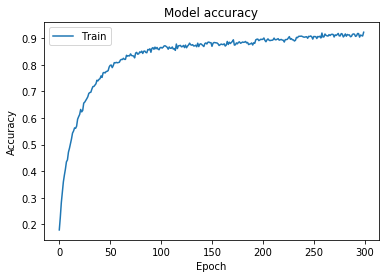

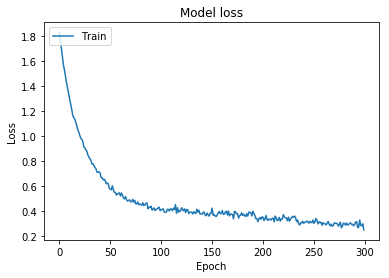

In [52]:
# Plot training & validation accuracy values
plt.plot(history.history['acc'])
# plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig(model_folder + '\\' + 'Model_Training_Accuracy.png')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
# plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'], loc='upper left')
plt.savefig(model_folder + '\\' + 'Model_Training_Loss.png')
plt.show()

In [53]:
predict = model.predict(test_X, batch_size = 16)

In [54]:
len(predict)

759

In [55]:
def decode_emo(predict, y_true):
    emotions=['happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  
    #predicted emotions from the test set  
    y_pred = np.argmax(predict, 1)  
    predicted_emo=[]   
    for i in range(0,y_true.shape[0]):  
      emo=emotions[y_pred[i]]  
      predicted_emo.append(emo)
#     print(len(predicted_emo))
    return y_pred, predicted_emo

y_pred, predicted_emo = decode_emo(predict, test_Y)

In [56]:
actual_emo=[]  
emotions=['happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  
y_true=np.argmax(test_Y, 1)  
for i in range(0,test_Y.shape[0]):  
  emo=emotions[y_true[i]]  
  actual_emo.append(emo)
print(len(actual_emo))

759


In [57]:
## Calculating Error
print(np.sum(y_pred - y_true))

3


In [58]:
example = 83
print(predicted_emo[example])
print(actual_emo[example])

surprised
surprised


           angry  disgust  fearful  happy  sad  surprised
angry        115        6        0      1    0          5
disgust        4      107        1      2    6          6
fearful        2        0      111      2    6          6
happy          5        3        3    111    1          3
sad            0        2        1      3  119          2
surprised      2        3        2      4    3        112


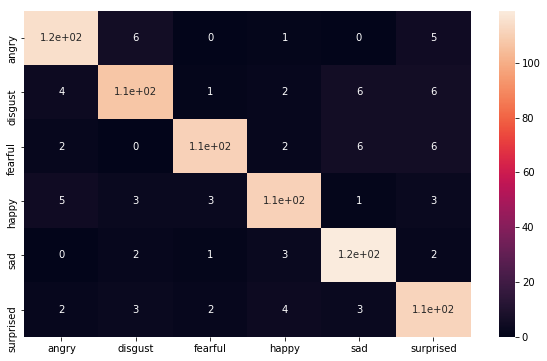

In [59]:
#### generate the confusion matrix
np.set_printoptions(formatter={'all':lambda x: str(x)}, suppress=True) #prevent numpy exponential notation on print, default False
cm = confusion_matrix(actual_emo, predicted_emo)
index = ['angry', 'disgust', 'fearful', 'happy', 'sad', 'surprised']
columns = ['angry', 'disgust', 'fearful', 'happy', 'sad', 'surprised']
cm_df = pd.DataFrame(cm,index,columns)
print(cm_df)
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True)
plt.savefig(model_folder + '\\' + 'Confusion_Matrix.png')

In [60]:
def classifaction_report_csv(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv('report.csv', index = False)

print(classification_report(y_true, y_pred))
report_dict = classification_report(y_true, y_pred, output_dict=True)
df = pd.DataFrame(report_dict)
# report = classification_report(y_true, y_pred)
# classifaction_report_csv(report)

accuracy = accuracy_score(y_true, y_pred)
print('Accuracy = ' + str(accuracy))
file = open(model_folder + '\\' + 'Report.txt', 'w+')
file.write('Accuracy : ' + str(accuracy))
file.close()

df.to_csv(model_folder + '\\' + 'Classification_Report.csv', sep=',', mode='a')

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       126
           1       0.88      0.94      0.91       127
           2       0.90      0.91      0.90       127
           3       0.94      0.87      0.91       127
           4       0.88      0.85      0.87       126
           5       0.84      0.89      0.86       126

   micro avg       0.89      0.89      0.89       759
   macro avg       0.89      0.89      0.89       759
weighted avg       0.89      0.89      0.89       759

Accuracy = 0.8893280632411067


In [25]:
# Testing Model

# Loading Features
features_dir = 'Features_and_Labels\\'

X = np.load(features_dir + 'Features_only_MFCC.npy')
Y = np.load(features_dir + 'Labels_only_MFCC.npy')

In [34]:
train_X, test_X, train_Y, test_Y = train_test_split(X, encoded_labels, test_size = 0.1317, random_state = 42, shuffle = True, stratify = Y)

In [35]:
print(train_X.shape)
print(train_Y.shape)
print(test_X.shape)
print(test_Y.shape)

(5001, 40)
(5001, 6)
(759, 40)
(759, 6)


In [36]:
train_X_cnn = np.expand_dims(train_X, axis = 2)
test_X_cnn = np.expand_dims(test_X, axis = 2)
print(train_X_cnn.shape)
print(test_X_cnn.shape)

(5001, 40, 1)
(759, 40, 1)


In [7]:
saved_model_dir = 'Saved_Models\\'
model = load_model(saved_model_dir + '2_only_MFCC_Augmentated_data_Stratify_Y_Conv1D_RMSProp_0.0002_decay_1e-6_100_epochs\\2_only_MFCC_Augmentated_data_Stratify_Y_Conv1D_RMSProp_0.0002_decay_1e-6_100_epochs.h5')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


In [37]:
predict = model.predict(test_X_cnn, batch_size = 16)

In [48]:
y_pred, predicted_emo = decode_emo(predict, test_Y)

759


ValueError: too many values to unpack (expected 2)

In [40]:
test_Y[0]

array([0., 0., 0., 0., 0., 1.])

In [41]:
encoded_labels = one_hot_encode(Y)

In [42]:
encoded_labels.shape

(5760, 6)

In [44]:
emotions=['happy', 'sad', 'angry', 'fearful', 'disgust', 'surprised']  
actual_emo=[]  
y_true=np.argmax(test_Y, 1)  
for i in range(0,test_Y.shape[0]):  
  emo=emotions[y_true[i]]  
  actual_emo.append(emo)
print(len(actual_emo))

759


In [45]:
example = 83
print(predicted_emo[example])
print(actual_emo[example])

happy
happy


           angry  disgust  fearful  happy  sad  surprised
angry        127        0        0      0    0          0
disgust        1      124        1      1    0          0
fearful        0        0      127      0    0          0
happy          0        0        0    125    0          1
sad            0        0        0      0  126          0
surprised      0        0        0      2    1        123


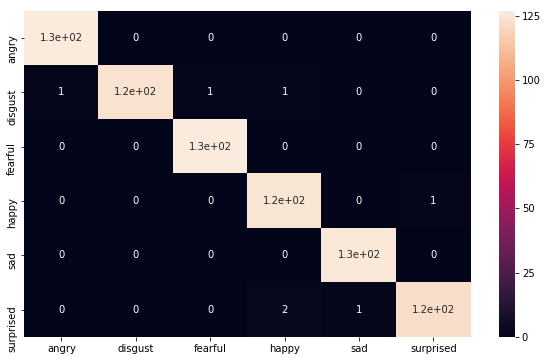

In [46]:
#### generate the confusion matrix
np.set_printoptions(formatter={'all':lambda x: str(x)}, suppress=True) #prevent numpy exponential notation on print, default False
cm = confusion_matrix(actual_emo, predicted_emo)
index = ['angry', 'disgust', 'fearful', 'happy', 'sad', 'surprised']
columns = ['angry', 'disgust', 'fearful', 'happy', 'sad', 'surprised']
cm_df = pd.DataFrame(cm,index,columns)
print(cm_df)
plt.figure(figsize=(10,6))
sns.heatmap(cm_df, annot=True)
#plt.savefig(model_folder + '\\' + 'Confusion_Matrix.png')

In [50]:
def classifaction_report_csv(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['class'] = row_data[0]
        row['precision'] = float(row_data[1])
        row['recall'] = float(row_data[2])
        row['f1_score'] = float(row_data[3])
        row['support'] = float(row_data[4])
        report_data.append(row)
    dataframe = pd.DataFrame.from_dict(report_data)
    dataframe.to_csv('report.csv', index = False)

print(classification_report(y_true, y_pred))
report_dict = classification_report(y_true, y_pred, output_dict=True)
df = pd.DataFrame(report_dict)
# report = classification_report(y_true, y_pred)
# classifaction_report_csv(report)

accuracy = accuracy_score(y_true, y_pred)
print('Accuracy = ' + str(accuracy))
# file = open(model_folder + '\\' + 'Report.txt', 'w+')
# file.write('Accuracy : ' + str(accuracy))
# file.close()

# df.to_csv(model_folder + '\\' + 'Classification_Report.csv', sep=',', mode='a')

              precision    recall  f1-score   support

           0       0.98      0.99      0.98       126
           1       0.99      1.00      1.00       126
           2       0.99      1.00      1.00       127
           3       0.99      1.00      1.00       127
           4       1.00      0.98      0.99       127
           5       0.99      0.98      0.98       126

   micro avg       0.99      0.99      0.99       759
   macro avg       0.99      0.99      0.99       759
weighted avg       0.99      0.99      0.99       759

Accuracy = 0.9907773386034255


In [57]:
test_speech_dir = 'Avani\\'
test_speech = 'Sad_Strong_02_02.wav'
signalData, sampling_rate = librosa.load(test_speech_dir + test_speech)
mfccs = extract_features_only_mfcc(signalData, sampling_rate)
features, labels = np.empty((0, 40)), np.empty(0)
features = np.vstack([features, mfccs])

label_name = test_speech.split('_')[0]
label_no = 0

# Converting Label name to label number for one hot encoding
if label_name == 'Angry':
    label_no = 5
elif label_name == 'Fear':
    label_no = 6
elif label_name == 'Disgust':
    label_no = 7
elif label_name == 'Surprise':
    label_no = 8
elif label_name == 'Happy':
    label_no = 3
elif label_name == 'Sad':
    label_no = 4
labels = np.append(labels, label_no - 3)
features = np.array(features)
labels = np.array(labels, dtype = np.int)

In [60]:
print(features.shape)
print(labels.shape)

(1, 40)
(1,)


In [65]:
encoded_labels = np.array(one_hot_encode(labels), dtype = np.int)

In [67]:
encoded_labels.shape

(1, 6)

In [78]:
test_cnn = np.expand_dims(features, axis = 2)
test_cnn.shape

(1, 40, 1)

In [72]:
predict = model.predict(test_cnn)

In [73]:
predict

array([[2.6059638e-08, 0.005824138, 0.0004386145, 0.020967491,
        0.97276974, 1.3572402e-15]], dtype=float32)

In [76]:
y_pred, predicted_emo = decode_emo(predict, encoded_labels)

1


In [79]:
actual_emo=[]  
y_true=np.argmax(encoded_labels, 1)  
for i in range(0,encoded_labels.shape[0]):  
  emo=emotions[y_true[i]]
  actual_emo.append(emo)
print(len(actual_emo))

1


In [81]:
print(predicted_emo[0])
print(actual_emo[0])

disgust
sad
